# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
#list units
units = "imperial"
#create empty lists for the metrics you are going to pull down
temperature_l = []
humidity_l=[]
cloudiness_l=[]
wind_speed_l =[]
lat_l=[]
lon_l=[]
city_l=[]
country_l=[]
date_l=[]

# Build query URL and request your results in Fahrenheit.  Go through each city in cities list.
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
   
    weather_json = requests.get(query_url).json()
    #check if city exists.  If so process the data else print not found, 
    #include name from API so that city list is only of cities that exist
    try:
        temperature = weather_json["main"]["temp_max"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        lat=weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        cityw=weather_json["name"]
        country=weather_json["sys"]["country"]
        date=weather_json["dt"]
        temperature_l.append(temperature)
        humidity_l.append(humidity)
        cloudiness_l.append(cloudiness)
        wind_speed_l.append(wind_speed)
        lat_l.append(lat)
        lon_l.append(lon)
        country_l.append(country)
        city_l.append(cityw)
        date_l.append(date)
        print(f"Processed ID = {weather_json['id']} Name = {city}")
    except:
        print(f"{city} not found")
    
    
    


Processed ID = 3146487 Name = raudeberg
Processed ID = 1494523 Name = polovinnoye
Processed ID = 964432 Name = port alfred
Processed ID = 5855927 Name = hilo
Processed ID = 2022572 Name = khatanga
Processed ID = 933535 Name = letlhakane
Processed ID = 2138522 Name = poya
tumannyy not found
Processed ID = 3874787 Name = punta arenas
Processed ID = 5012495 Name = traverse city
Processed ID = 6138908 Name = saint-philippe
Processed ID = 6167817 Name = torbay
attawapiskat not found
Processed ID = 3443061 Name = chuy
Processed ID = 2126123 Name = chokurdakh
Processed ID = 5354943 Name = half moon bay
Processed ID = 3421719 Name = narsaq
Processed ID = 1490256 Name = talnakh
Processed ID = 3833367 Name = ushuaia
Processed ID = 3372707 Name = ribeira grande
Processed ID = 3980172 Name = villa guerrero
Processed ID = 1733782 Name = victoria
Processed ID = 5969785 Name = hamilton
Processed ID = 2641434 Name = northam
Processed ID = 1273574 Name = vaini
Processed ID = 3517970 Name = pochutla
Pro

Processed ID = 3036965 Name = le port
Processed ID = 3459531 Name = jussara
Processed ID = 118704 Name = ravar
Processed ID = 4267710 Name = sitka
Processed ID = 1501460 Name = kulunda
Processed ID = 1257599 Name = salon
Processed ID = 2271968 Name = aljezur
Processed ID = 5886182 Name = antigonish
Processed ID = 5746545 Name = portland
Processed ID = 5961417 Name = husavik
Processed ID = 1244926 Name = hambantota
Processed ID = 1625929 Name = sungaipenuh
Processed ID = 643453 Name = sola
Processed ID = 3466165 Name = cidreira
Processed ID = 2729907 Name = longyearbyen
Processed ID = 3412093 Name = vestmannaeyjar
Processed ID = 3702577 Name = portobelo
Processed ID = 2100765 Name = angoram
Processed ID = 2063036 Name = port lincoln
Processed ID = 2079582 Name = alyangula
Processed ID = 64013 Name = bosaso
Processed ID = 2413070 Name = nioro
Processed ID = 1026014 Name = tete
Processed ID = 3187694 Name = sibenik
Processed ID = 780687 Name = berlevag
Processed ID = 6693679 Name = gizo
g

Processed ID = 583548 Name = aktyubinskiy
Processed ID = 3994469 Name = ojinaga
Processed ID = 579432 Name = balezino
Processed ID = 1263852 Name = mandla
Processed ID = 1815024 Name = hutang
Processed ID = 1784874 Name = houma
Processed ID = 1646170 Name = karangasem
Processed ID = 1065158 Name = farafangana
Processed ID = 5006946 Name = chase
Processed ID = 1861416 Name = ishigaki
andevoranto not found
Processed ID = 2123614 Name = makarov
Processed ID = 778362 Name = oksfjord
Processed ID = 3587498 Name = acajutla
Processed ID = 3652758 Name = puerto baquerizo moreno
Processed ID = 898947 Name = senanga
Processed ID = 1058381 Name = morondava
Processed ID = 3861953 Name = chacabuco
Processed ID = 217745 Name = bumba
Processed ID = 3622854 Name = miramar
Processed ID = 2094746 Name = kandrian
Processed ID = 502010 Name = revda
Processed ID = 1260232 Name = partapur
Processed ID = 4470244 Name = havelock
Processed ID = 53654 Name = mogadishu
Processed ID = 1015969 Name = brandfort
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
#create a dataframe

weather_df=pd.DataFrame({"City": city_l, "Country": country_l, "Date": date_l, "Max Temperature (F)": temperature_l, 
                         "Humidity (%)": humidity_l, "Cloudiness (%)": cloudiness_l, "Wind Speed (mph)":wind_speed_l, "Latitude": lat_l, "Longitude": lon_l})
#export to csv
weather_csv = weather_df.to_csv("city_weather.csv",index=False, header=True)
#display dataframe
weather_df

,City,Country,Date,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Raudeberg,NO,1561069282,53.60,87,28,18.34,61.99,5.14
1,Polovinnoye,RU,1561069283,59.71,65,89,10.40,54.79,65.99
2,Port Alfred,ZA,1561069283,66.99,40,19,7.00,-33.59,26.89
3,Hilo,US,1561069176,84.20,54,40,10.29,19.71,-155.08
4,Khatanga,RU,1561069283,49.09,57,100,11.79,71.98,102.47
5,Letlhakane,BW,1561069283,48.91,75,0,10.13,-21.42,25.59
6,Poya,NC,1561069283,69.97,80,46,6.82,-21.35,165.16
7,Punta Arenas,CL,1561069284,35.60,74,75,1.12,-53.16,-70.91
8,Traverse City,US,1561069284,71.60,43,75,10.29,44.76,-85.62
9,Saint-Philippe,CA,1561069284,64.00,88,90,16.11,45.36,-73.48


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

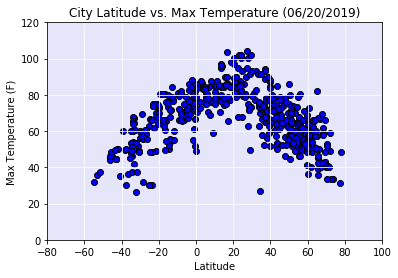

In [88]:
x_latitude = weather_df.iloc[:,7]
y_maxtemp = weather_df.iloc[:,3]
y_humidity = weather_df.iloc[:,4]
y_cloudiness = weather_df.iloc[:,5]
y_wind = weather_df.iloc[:,6]

#plot y_maxtemp vs x_latitude
fig, ax1 = plt.subplots()
plt.scatter(x_latitude,y_maxtemp, edgecolor="black", c="blue", marker='o')
plt.grid(color="white")
plt.title("City Latitude vs. Max Temperature (06/20/2019)")
ax1.set_facecolor("lavender")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(0,120)
plt.show()
fig.savefig('..\images\MaxTemp.png')

#### Latitude vs. Humidity Plot

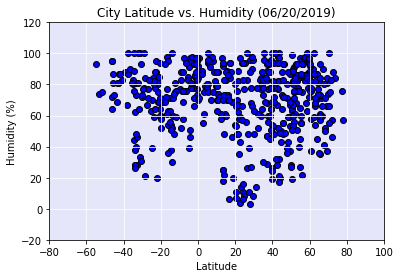

In [89]:
#plot y_humidity vs x_latitude
fig, ax1 = plt.subplots()
ax1.set_facecolor("lavender")
plt.scatter(x_latitude,y_humidity, edgecolor="black", c="blue", marker='o')
plt.grid(color="white")
plt.title("City Latitude vs. Humidity (06/20/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.show()
fig.savefig('..\images\Humidity.png')

#### Latitude vs. Cloudiness Plot

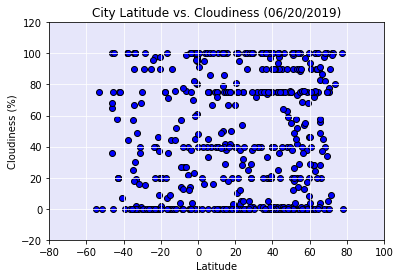

In [90]:
#plot y_cloudiness vs x_latitude
fig, ax1 = plt.subplots()
ax1.set_facecolor("lavender")
plt.scatter(x_latitude,y_cloudiness, edgecolor="black", c="blue", marker='o')
plt.title("City Latitude vs. Cloudiness (06/20/2019)")
plt.grid(color="white")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.show()
fig.savefig('..\images\Cloudiness.png')

#### Latitude vs. Wind Speed Plot

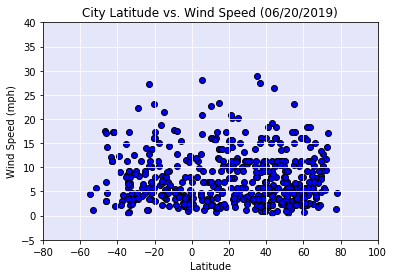

In [91]:
#plot y_wind vs x_latitude
fig, ax1 = plt.subplots()
ax1.set_facecolor("lavender")
plt.scatter(x_latitude,y_wind, edgecolor="black", c="blue", marker='o')
plt.grid(color="white")
plt.title("City Latitude vs. Wind Speed (06/20/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.show()
fig.savefig('..\images\WindSpeed.png')